In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\mushrooms.csv


classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t


stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
mushrooms = pd.read_csv('./data\mushrooms.csv')

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushrooms.shape

(8124, 23)

In [5]:
poisonus = {'e':0,'p':1}
clazz = mushrooms['class']
clazz = clazz.map(poisonus)
mushrooms['class'] = clazz

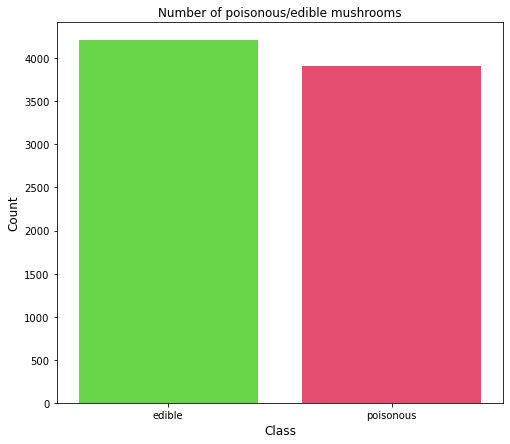

In [6]:
count = clazz.value_counts()
plt.figure(figsize=(8, 7))
sns.barplot(x=['edible','poisonous'], y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

In [7]:
from collections import defaultdict

clazz = {
    0 : 'edible',
    1 : 'poisonous'
}


def poisonousByclass(dataset,column,labelColumn):
    values = defaultdict(lambda:[0,0])
    colomnData = mushrooms[[column, 'class']].copy()
    colomnData[column] = colomnData[column].map(labelColumn)

    colomnData = colomnData.groupby([column, 'class'])['class'].agg(['count'])
    colomnData = colomnData.reset_index()

    for index, row in colomnData.iterrows():
        key = row[column]
        clazz = row['class']
        count = row['count']
    
        values[key][clazz] = count
    
    valuesOrdered = {k: v for k, v in sorted(values.items(), key=lambda item: item[1][0] + item[1][1],reverse=True)}

    #print(valuesOrdered)
    
    labels = list(valuesOrdered.keys())

    ind = [x for x,_ in enumerate(labels)]
    data = np.array(list(valuesOrdered.values()))

    edible = data[:,0]
    poisonous = data[:,1]

    plt.bar(labels,poisonous,width = 0.45,label="edible",bottom=edible,color="green")
    plt.bar(labels,edible,width = 0.45,label="poisonous",color="red")
    plt.legend(loc="upper right")
    plt.xticks(ind,labels)

    plt.show()

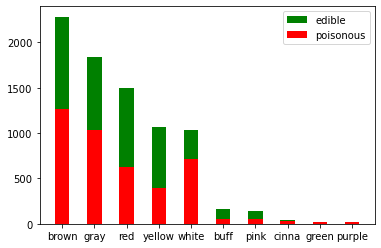

In [8]:
capColor = {
    'n' : 'brown',
    'b' : 'buff' ,
    'c' : 'cinna',
    'g' : 'gray',
    'r' : 'green',
    'p' : 'pink',
    'u' : 'purple',
    'e' : 'red',
    'w' : 'white',
    'y' : 'yellow'
}

poisonousByclass(mushrooms,'cap-color',capColor)

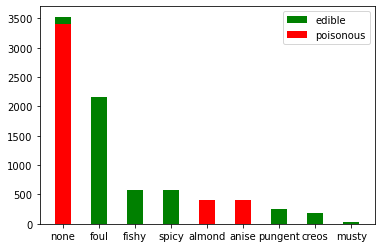

In [9]:
odor = {
	'a':'almond',
	'l':'anise',
	'c':'creos',
	'y':'fishy',
	'f':'foul',
	'm':'musty',
	'n':'none',
	'p':'pungent',
	's':'spicy'
}

poisonousByclass(mushrooms,'odor',odor)

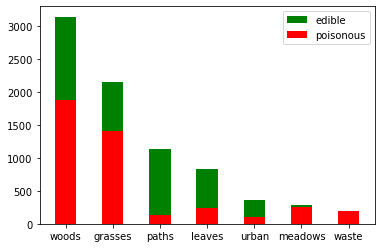

In [11]:
habitat = {
    'g':'grasses',
    'l':'leaves',
    'm':'meadows',
    'p':'paths',
    'u':'urban',
    'w':'waste',
    'd':'woods'
}

poisonousByclass(mushrooms,'habitat',habitat)

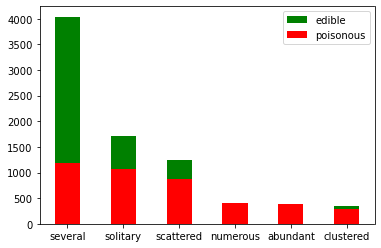

In [12]:
population = {
'a' : 'abundant',
'c' : 'clustered',
'n' : 'numerous',
's' : 'scattered',
'v' : 'several',
'y' : 'solitary'
}

poisonousByclass(mushrooms,'population',population)

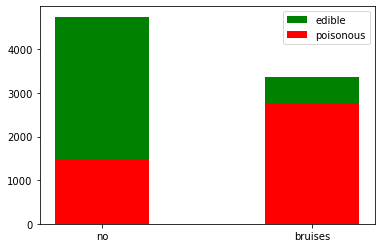

In [13]:
bruises = {
    't' : 'bruises',
    'f' : 'no'
}

poisonousByclass(mushrooms,'bruises',bruises)

In [14]:
def calc_smooth_mean(df, by, on, m):
    #Calcolo la media globale
    mean = df[on].mean()

    #Calcolo il numero di valori e la media per ogni gruppo
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    #Calcolo la media "smussata"
    smooth = (counts * means + m * mean) / (counts + m)

    #Rimpiazzo ogni classe con la media calcolata prima
    return df[by].map(smooth)




In [15]:
columns = mushrooms.columns
for col in columns:
    if col != 'class':
        mushrooms[col] = calc_smooth_mean(mushrooms, by=col, on='class', m=10)

mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.467218,0.552151,0.446739,0.185712,0.980527,0.492532,0.558314,0.883751,0.164642,...,0.311529,0.383733,0.383437,0.482029,0.493171,0.508512,0.206340,0.121584,0.296360,0.732329
1,0,0.467218,0.552151,0.625527,0.185712,0.011757,0.492532,0.558314,0.301818,0.164642,...,0.311529,0.383733,0.383437,0.482029,0.493171,0.508512,0.206340,0.115683,0.011757,0.345144
2,0,0.114330,0.552151,0.309353,0.185712,0.011757,0.492532,0.558314,0.301818,0.110416,...,0.311529,0.383733,0.383437,0.482029,0.493171,0.508512,0.206340,0.115683,0.011757,0.135167
3,1,0.467218,0.536208,0.309353,0.185712,0.980527,0.492532,0.558314,0.883751,0.110416,...,0.311529,0.383733,0.383437,0.482029,0.493171,0.508512,0.206340,0.121584,0.296360,0.732329
4,0,0.467218,0.552151,0.439362,0.692900,0.035280,0.492532,0.088366,0.301818,0.164642,...,0.311529,0.383733,0.383437,0.482029,0.493171,0.508512,0.636332,0.115683,0.012234,0.345144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.721743,0.552151,0.446739,0.692900,0.035280,0.103729,0.558314,0.301818,0.279378,...,0.311529,0.023863,0.023863,0.482029,0.045474,0.508512,0.206340,0.083108,0.162344,0.708813
8120,0,0.467218,0.552151,0.446739,0.692900,0.035280,0.103729,0.558314,0.301818,0.279378,...,0.311529,0.023863,0.023863,0.482029,0.045474,0.508512,0.206340,0.083108,0.704400,0.708813
8121,0,0.493618,0.552151,0.446739,0.692900,0.035280,0.103729,0.558314,0.301818,0.110416,...,0.311529,0.023863,0.023863,0.482029,0.045474,0.508512,0.206340,0.083108,0.162344,0.708813
8122,1,0.721743,0.536208,0.446739,0.692900,0.991161,0.492532,0.558314,0.883751,0.997020,...,0.935532,0.383733,0.383437,0.482029,0.493171,0.508512,0.636332,0.757640,0.704400,0.708813


In [16]:
y = mushrooms.pop('class')

In [17]:
X = mushrooms.copy()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [20]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'C': param_range, 
               'kernel': ['linear']},
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]

model = SVC()

gs = GridSearchCV(estimator=model, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print("Model accuracy is: {0:.2f}%".format(gs.best_score_ * 100))
print(gs.best_params_)

L'accuratezza del modello è 100.00%
{'C': 10.0, 'kernel': 'linear'}


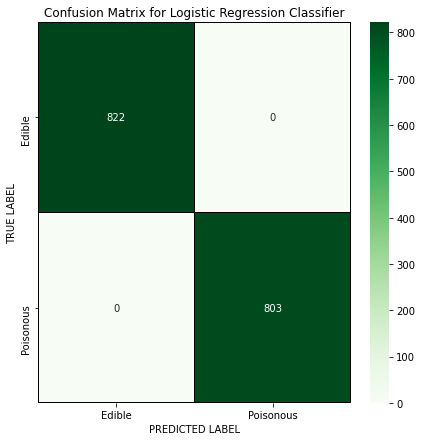

In [21]:
from sklearn.metrics import confusion_matrix

y_pred_lr = gs.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Greens",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
# plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

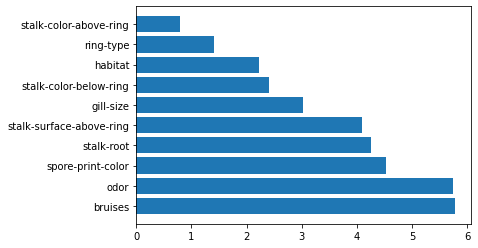

In [22]:
model = gs.best_estimator_

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
f_importances(abs(model.coef_[0]),X_train.columns,10)

